In [1]:
import numpy as np
from mpl_toolkits import mplot3d
from rom_am import *
import matplotlib.pyplot as plt

In [2]:
with open("../DATA/training_data.csv") as f:
    lines = (line for line in f if not line.startswith('#'))
    data = np.loadtxt(lines, delimiter=',', skiprows=1)

In [3]:
# initial time value
t0 = data[0, 0]

# time array
t = data[:, 0]
t_orig = t.copy()
nt = t.shape[0]

# index where to stop taking the snapshots (first current value)
t_lim = np.where(np.isclose(t, t.max()))[0][0]

# Snapshots
X = data[:, 2].reshape((-1, t_lim+1))
#X = data[:, 2].reshape((-1, nt))[:, :t_lim+1]
nt = t_lim + 1
t = t[:nt]

In [4]:
# DMD Learning

dt = t[-1]-t[-2]
dmd = DMD()
rom = ROM(dmd)
rom.decompose(X[:, :-1], Y=X[:, 1::], dt = dt, rank = 0, sorting="real", center=True)

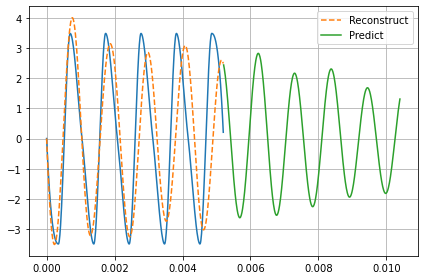

In [5]:
# DMD Prediction
pred_coeff = 2
t_predict = np.concatenate((t, np.linspace(t[-1] + dt, pred_coeff *t[-1], nt)))
dof_id = 0

prediction = np.real(rom.predict(t_predict,))
reconstr_cutoff = int((1/pred_coeff)*t_predict.shape[0])

plt.plot(t, X[dof_id, :]);
plt.plot(t_predict[:reconstr_cutoff], prediction[dof_id, :reconstr_cutoff], '--', label = 'Reconstruct');
plt.plot(t_predict[reconstr_cutoff::], prediction[dof_id, reconstr_cutoff::], label = 'Predict');
plt.grid();
plt.legend();
plt.tight_layout();

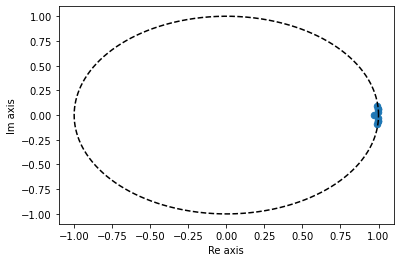

In [6]:
plt.plot(np.real(rom.model.lambd), np.imag(rom.model.lambd), '.', markersize = 13);
plt.xlabel("Re axis");
plt.ylabel("Im axis");
theta = np.linspace(0, 2*np.pi, 1024)
plt.plot(np.cos(theta), np.sin(theta), "k--");